<a href="https://colab.research.google.com/github/marcosilvaa/dados_estudos/blob/main/Biblioteca_Investpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.7 MB/s 
     |████████████████████████████████| 235 kB 13.6 MB/s 
     |████████████████████████████████| 6.4 MB 14.3 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=1a0eca21e129a1b146856b335210ba9d8aa33d9b7d2923be4545a836e6e3031d
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import investpy as ipy

Diferente da `PandasDataReader` e a `YahooFinance`, através da `investpy` não é necessário conhecer o ticker do ativo. Os parâmetros inseridos que serão resposáveis por determinar o ativo.


In [15]:
search_results = ipy.search_quotes(text = 'PETRO', products=['stocks'], countries=['Brazil'], n_results= 50)

In [19]:
for search_result in search_results:
  print(search_result)

{"id_": 18749, "name": "Petroleo Brasileiro SA", "symbol": "PETR3", "country": "brazil", "tag": "/equities/petrobras-on", "pair_type": "stocks", "exchange": "BM&FBovespa"}
{"id_": 18750, "name": "Petroleo Brasileiro SA PN", "symbol": "PETR4", "country": "brazil", "tag": "/equities/petrobras-pn", "pair_type": "stocks", "exchange": "BM&FBovespa"}
{"id_": 18697, "name": "Petro Rio SA", "symbol": "PRIO3", "country": "brazil", "tag": "/equities/hrt-petroleo-on-nm", "pair_type": "stocks", "exchange": "BM&FBovespa"}
{"id_": 1167309, "name": "3R Petroleum Oleo E Gas\u00a0Sa", "symbol": "RRRP3", "country": "brazil", "tag": "/equities/3r-petroleum-oleo-e-gas-sa", "pair_type": "stocks", "exchange": "BM&FBovespa"}
{"id_": 1172772, "name": "Petroreconcavo SA", "symbol": "RECV3", "country": "brazil", "tag": "/equities/petroreconcavo", "pair_type": "stocks", "exchange": "BM&FBovespa"}
{"id_": 1169278, "name": "PetroChina Co Ltd", "symbol": "PTCH34", "country": "brazil", "tag": "/equities/petrochina-c

A biblioteca vai buscar aquilo que foi pedido no argumento `text`, e pode ser tambem definido o número de resultados à ser apresentado. Dessa maneira a biblioteca nos retornou todos os ativos que contém `PETR` no nome.

Vamos reescrever o código para que ele nos retorne apenas aquilo que buscamos, o ativo PETROBRAS.

In [21]:
for search_result in search_results[1:2]:
  print(search_result)

{"id_": 18750, "name": "Petroleo Brasileiro SA PN", "symbol": "PETR4", "country": "brazil", "tag": "/equities/petrobras-pn", "pair_type": "stocks", "exchange": "BM&FBovespa"}


In [23]:
petr = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date='01/06/2021')

In [24]:
petr.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2014-01-02,15.49,15.54,15.04,15.13,17111300,-1.94
2014-01-03,15.12,15.16,14.83,14.83,17598400,-1.98
2014-01-06,14.86,15.03,14.60,15.01,20474600,1.21
2014-01-07,15.04,15.20,14.60,14.60,18785300,-2.73
2014-01-08,14.70,14.81,14.59,14.62,15558400,0.14


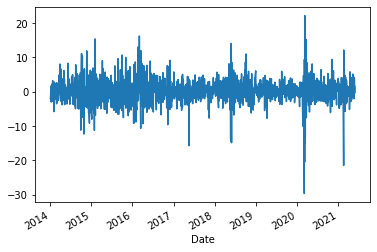

In [28]:
petr['Change Pct'].plot()

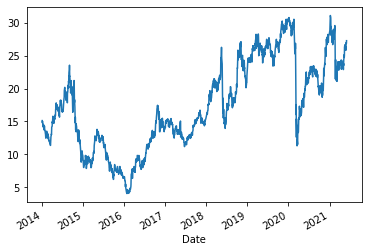

In [30]:
petr['Close'].plot()

#Obtendo dados de ações

In [47]:
search_results = ipy.search_quotes(text='magazine', products=['stocks'], countries=['brazil'], n_results=50)

for search_result in search_results:
  print(search_result)

{"id_": 18729, "name": "Magazine Luiza SA", "symbol": "MGLU3", "country": "brazil", "tag": "/equities/magaz-luiza-on-nm", "pair_type": "stocks", "exchange": "BM&FBovespa"}


In [51]:
mglu = search_result.retrieve_historical_data(from_date="01/01/2014", to_date="01/06/2021")

In [52]:
mglu

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2014-01-02,0.22,0.23,0.20,0.21,40896000,-4.55
2014-01-03,0.21,0.22,0.20,0.22,25686400,4.76
2014-01-06,0.22,0.23,0.22,0.23,18982400,4.55
2014-01-07,0.23,0.24,0.23,0.23,39680000,0.00
2014-01-08,0.23,0.24,0.23,0.24,25273600,4.35
...,...,...,...,...,...,...
2021-05-26,20.36,20.39,19.65,19.67,19389100,-1.75
2021-05-27,19.74,19.84,19.47,19.59,22358500,-0.41
2021-05-28,19.70,20.42,19.62,20.25,19345400,3.37


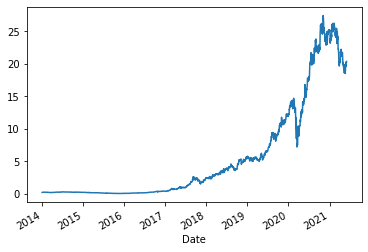

In [53]:
mglu['Close'].plot()

# Obtendo dados de Índices

In [62]:
search_results = ipy.search_quotes(text='bvsp', products=['indices'], countries=['brazil'], n_results=50)

for search_result in search_results[:1]:
  print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [63]:
ibov = search_result.retrieve_historical_data(from_date='01/01/2014', to_date='01/06/2021')

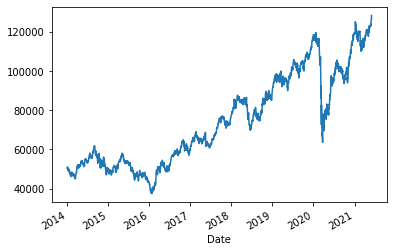

In [65]:
ibov['Close'].plot()

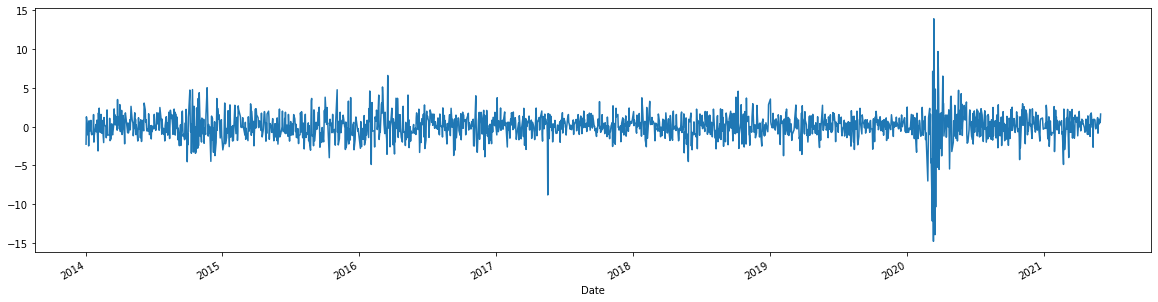

In [71]:
ibov['Change Pct'].plot(figsize=(20,5))

# Obtendo dados de ETF

Nome do ETF à ser inserido, deve ser o nome real ao invés do nome do ticker.

O nome real deve ser procurado no site Investing.com


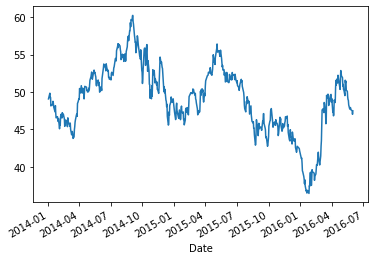

In [79]:
bova11 = ipy.get_etf_historical_data(etf='Ishares Ibovespa', country='Brazil', from_date='01/01/2014', to_date='01/06/2016')

bova11['Close'].plot()

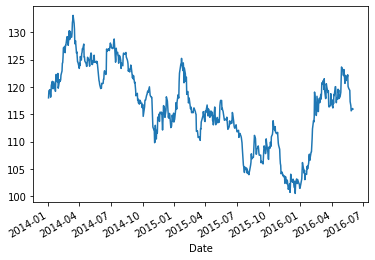

In [80]:
gld = ipy.get_etf_historical_data(etf='SPDR Gold Shares', country='united states', from_date='01/01/2014', to_date='01/06/2016')

gld['Close'].plot()

In [82]:
search_results = ipy.search_quotes(text='ewz', products=['etfs'], countries=['united states'], n_results=50)

for search_result in search_results[:1]:
  print(search_result)

{"id_": 509, "name": "iShares MSCI Brazil ETF", "symbol": "EWZ", "country": "united states", "tag": "/etfs/ishares-brazil-index", "pair_type": "etfs", "exchange": "NYSE"}


In [83]:
ewz = search_result.retrieve_historical_data(from_date='01/01/2014', to_date='01/06/2016')

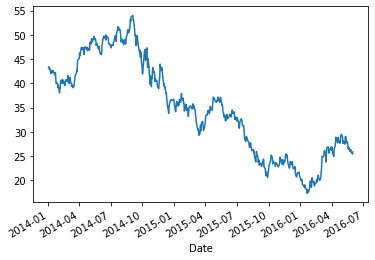

In [85]:
ewz['Close'].plot()

#Obtendo dados de commodities

In [102]:
search_results = ipy.search_quotes(text='soy', products=['commodities'], countries=['brazil'], n_results=50)

for search_result in search_results[:]:
  print(search_result)

{"id_": 964523, "name": "US Soybeans Futures", "symbol": "SJCc1", "country": null, "tag": "/commodities/us-soybeans?cid=964523", "pair_type": "commodities", "exchange": "BM&FBovespa"}


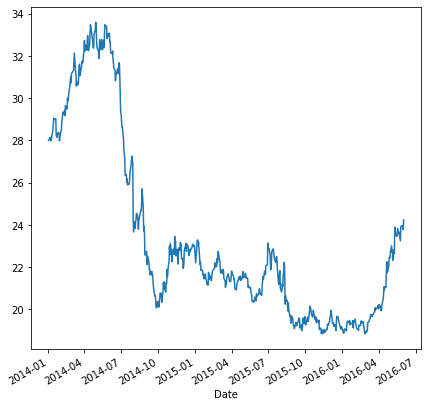

In [103]:
# obtendo dados de soja
soja_br = search_result.retrieve_historical_data(from_date='01/01/2014', to_date='01/06/2016')

soja_br['Close'].plot(figsize=(7,7))

In [104]:
# obtendo dados do milho
search_results = ipy.search_quotes(text='corn', products=['commodities'], countries=['brazil'], n_results=50)

for search_result in search_results[:]:
  print(search_result)

{"id_": 1181089, "name": "US Corn Futures", "symbol": "CCMc3", "country": null, "tag": "/commodities/us-corn?cid=1181089", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 1181088, "name": "US Corn Futures", "symbol": "CCMc2", "country": null, "tag": "/commodities/us-corn?cid=1181088", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 964522, "name": "US Corn Futures", "symbol": "CCMc1", "country": null, "tag": "/commodities/us-corn?cid=964522", "pair_type": "commodities", "exchange": "BM&FBovespa"}


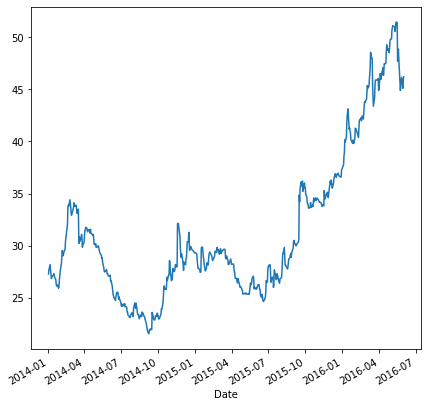

In [105]:
milho_br = search_result.retrieve_historical_data(from_date='01/01/2014', to_date='01/06/2016')

milho_br['Close'].plot(figsize=(7,7))

In [115]:
# obtendo dados do `boi gordo - cattle`
search_results = ipy.search_quotes(text='BGI', products=['commodities'], countries=['brazil'], n_results=50)

for search_result in search_results[:1]:
  print(search_result)

{"id_": 964528, "name": "Live Cattle Futures", "symbol": "BGIc1", "country": null, "tag": "/commodities/live-cattle?cid=964528", "pair_type": "commodities", "exchange": "BM&FBovespa"}


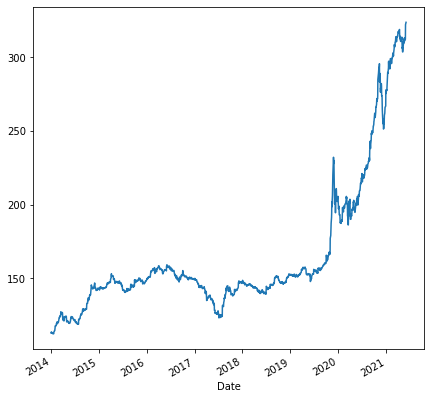

In [121]:
boi_gordo = search_result.retrieve_historical_data(from_date='01/01/2014', to_date='01/06/2021')
boi_gordo['Close'].plot(figsize=(7,7))

# Obtendo dados de Criptomoedas

In [129]:
btc = ipy.get_crypto_historical_data(crypto='bitcoin',from_date='18/07/2010', to_date='01/07/2022')

In [130]:
btc.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-07-18,0.0,0.1,0.1,0.1,75,USD
2010-07-19,0.1,0.1,0.1,0.1,574,USD
2010-07-20,0.1,0.1,0.1,0.1,262,USD
2010-07-21,0.1,0.1,0.1,0.1,575,USD
2010-07-22,0.1,0.1,0.1,0.1,2160,USD


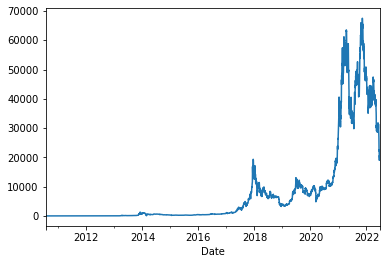

In [141]:
btc["Close"].plot()

# Obtendo dados do Tesouro Direto

In [145]:
# obtendo dados do tesouro direto
search_results = ipy.search_quotes(text='tesouro', products=['bonds'], countries=['brazil'], n_results=50)

for search_result in search_results[6:7]:
  print(search_result)

{"id_": 1089897, "name": "Tesouro IPCA + NTNB 6 15-May-2045", "symbol": "NTB051545=", "country": "brazil", "tag": "/rates-bonds/ntnb-6-15-may-2045", "pair_type": "bonds", "exchange": "OTC Bonds"}


In [146]:
ipca_2045 = search_result.retrieve_historical_data(from_date='01/01/2014', to_date='01/06/2021')

In [148]:
ipca_2045.head()

,Open,High,Low,Close,Change Pct
Date,,,,,
2016-07-04,2865.733,2865.733,2865.733,2865.733,0.02
2016-07-05,2840.310,2840.310,2840.310,2840.310,-0.89
2016-07-06,2833.601,2833.601,2833.601,2833.601,-0.24
2016-07-07,2834.282,2834.282,2834.282,2834.282,0.02
2016-07-08,2860.950,2860.950,2860.950,2860.950,0.94


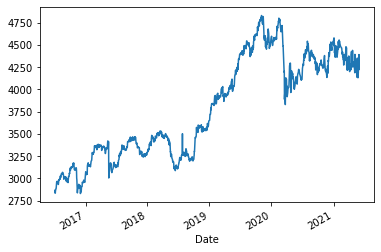

In [150]:
ipca_2045['Close'].plot()